# Data Visualization

### Objectives

* Answer business requirement 1 :
    - The client seeks to undertake a study aimed at visually differentiating healthy bones from fractured ones.

### Inputs

* inputs/fracture_dataset/bone_fracture/bone_fracture/test
* inputs/fracture_dataset/bone_fracture/bone_fracture/train
* inputs/fracture_dataset/bone_fracture/bone_fracture/val

### Outputs

* Scatterplot of the image shape.
* Mean and variability of images per label plot.
* Plot to distinguish contrast between healthy bone and fractured bone images.
* Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard.

---

# Set Data Directory

### Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

### Set Working directory

In [11]:
current_dir = os.getcwd()
current_dir

'/workspace/Bone-Fracture-Detection'

In [12]:
os.chdir('/workspace/Bone-Fracture-Detection')

In [13]:
work_dir = os.getcwd()
work_dir

'/workspace/Bone-Fracture-Detection'

### Set input directory

In [6]:
parent_path = 'inputs/fracture_dataset/bone_fracture/bone_fracture'
train_path = parent_path + '/train'
val_path = parent_path + '/val'
test_path = parent_path + '/test'

### Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
	print('Old version is already available create a new version.')
	pass
else:
	os.makedirs(name = file_path)

Old version is already available create a new version.


### Set label names

In [8]:
labels = os.listdir(train_path)
print('Folders inside the train test and val folders are :', labels)

Folders inside the train test and val folders are : ['fractured', 'unfractured']


---

# Data visualisation of bone fracture data

### Image shape, calculate the average size of images in the training set

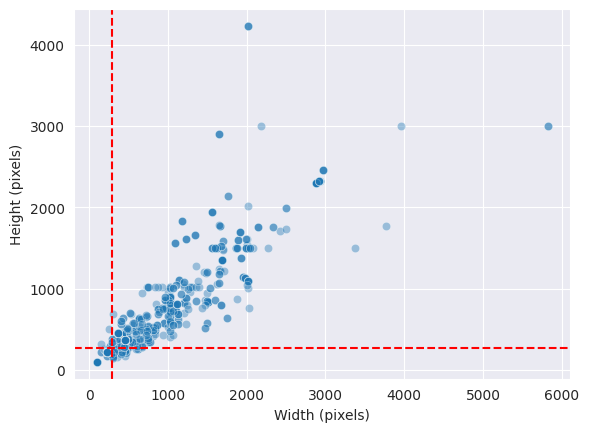

Width average: 273 
Height average: 290


In [16]:
x_dim, y_dim = [], []
for label in labels:
  for image_name in os.listdir(train_path + '/' + label):
    img = imread(train_path + '/' + label + '/' + image_name)
    dx, dy, colors = img.shape
    x_dim.append(dx)
    y_dim.append(dy)


sns.set_style("darkgrid")
fig, axes = plt.subplots()
sns.scatterplot(x=x_dim, y=y_dim, alpha=0.4)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
x_dim_mean = int(np.array(x_dim).mean())
y_dim_mean = int(np.array(y_dim).mean())
axes.axhline(y=y_dim_mean, color='r', linestyle='--')
axes.axvline(x=x_dim_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {y_dim_mean} \nHeight average: {x_dim_mean}")